In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

import os

In [2]:
file_path = "../dataset/titanic.csv"
if not os.path.exists(file_path):
    print('downloading Dataset...')
    df = sns.load_dataset('titanic').to_csv(file_path, index=False)
    
df = pd.read_csv("../dataset/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

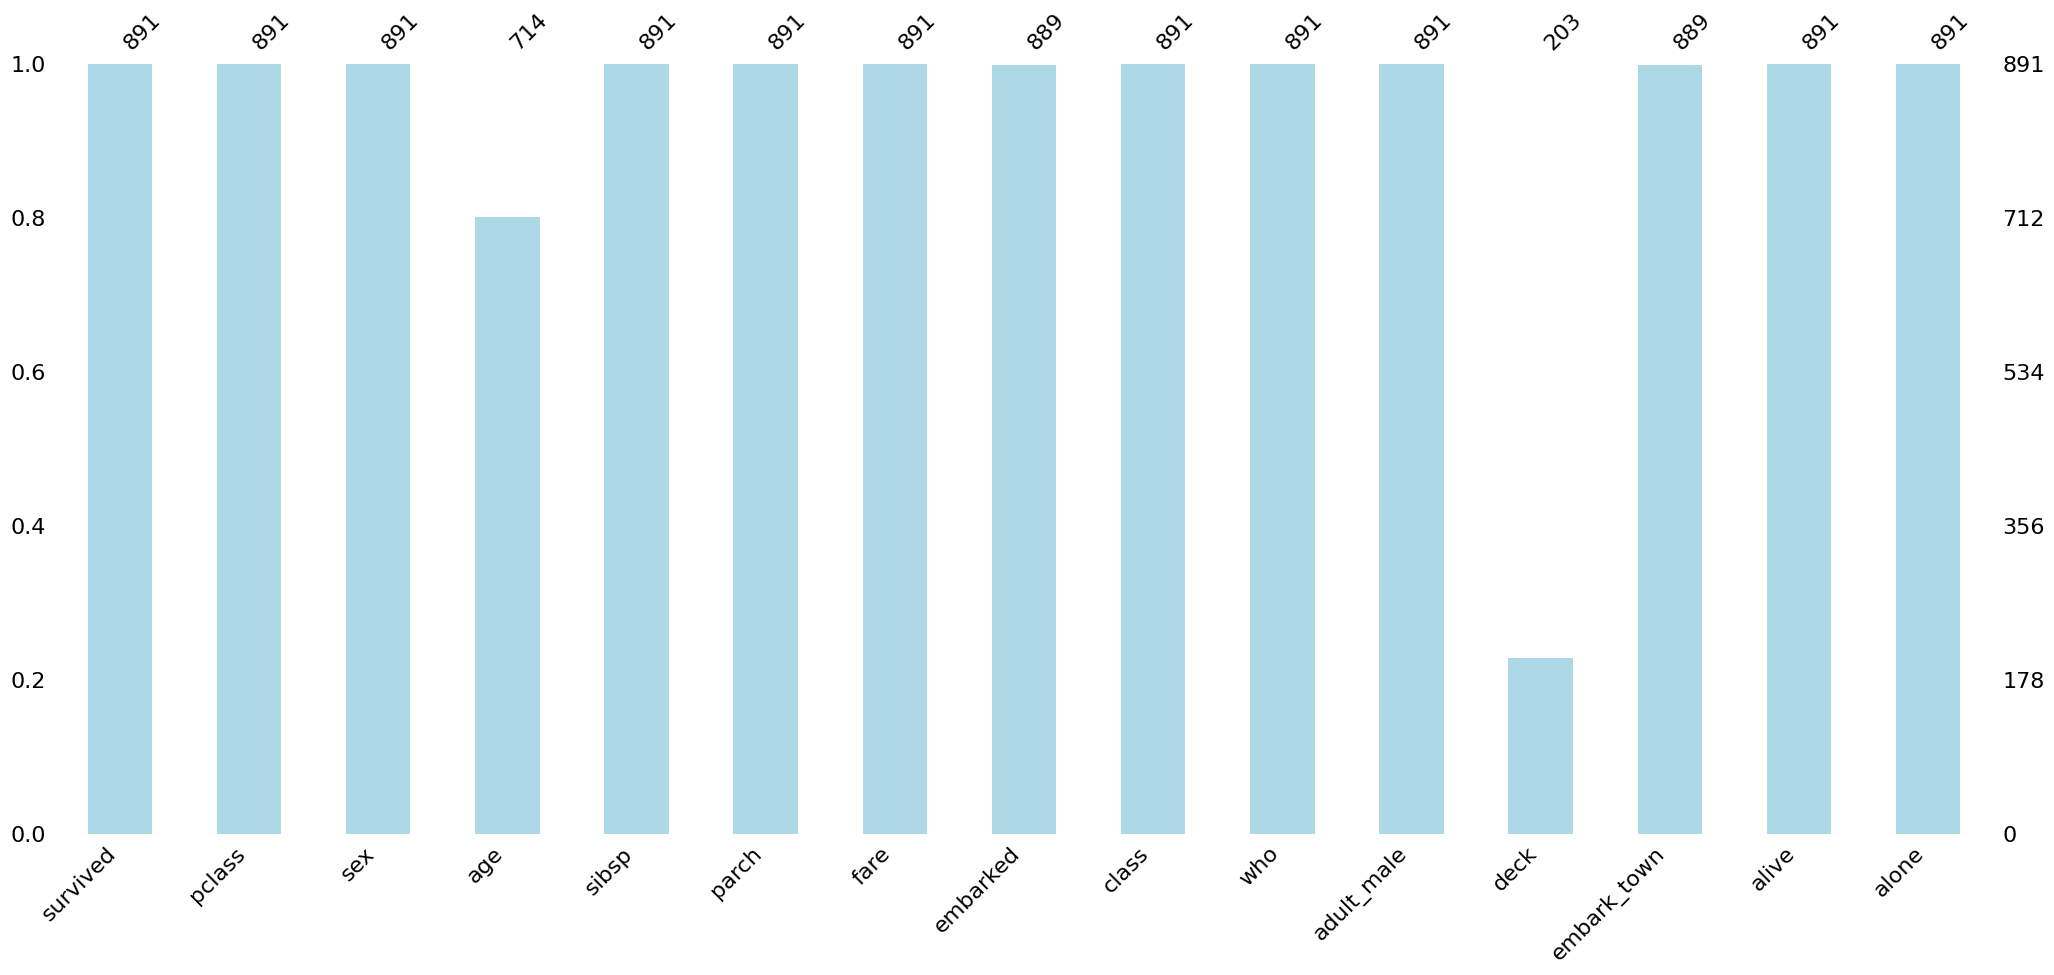

In [6]:
p=msno.bar(df,color="lightblue")

In [7]:
missing_data = df.isnull()

fig = px.imshow(
    missing_data,
    labels=dict(x="Columns", y="Index", color="Missing"),
    x=missing_data.columns,
    y=missing_data.index,
    color_continuous_scale=[(0, 'white'), (1, 'pink')],
    aspect="auto"
)

fig.update_layout(
    title="Missing Values Heatmap",
    xaxis_title="Columns",
    yaxis_title="Index"
)

fig.show()

In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

mean_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = mean_imputer.fit_transform(df[numerical_cols])


freq_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = freq_imputer.fit_transform(df[categorical_cols])

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.000000,0.0,0.0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1.0,1.0,female,19.000000,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3.0,female,29.699118,1.0,2.0,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1.0,1.0,male,26.000000,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

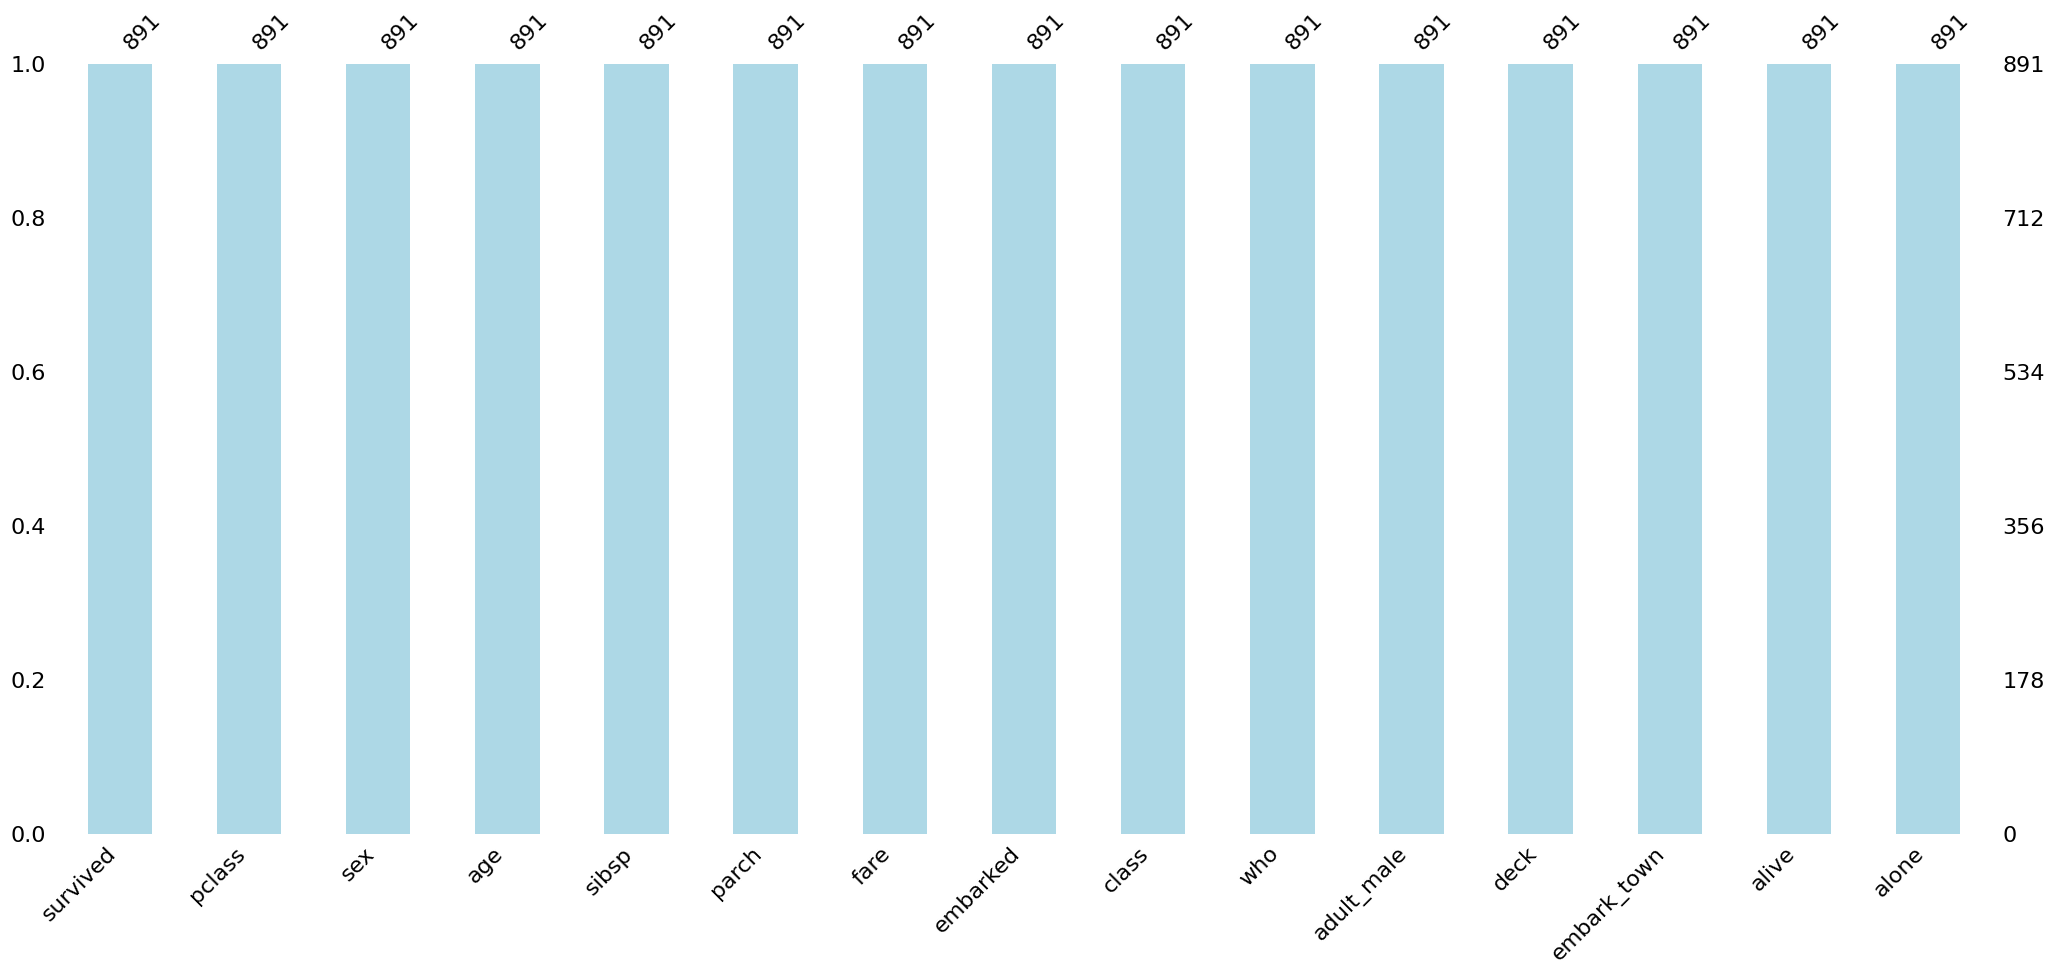

In [10]:
p=msno.bar(df,color="lightblue")

In [11]:
def calculate_iqr_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [12]:
# Detect outliers using the helper function
def detect_outliers_iqr(data, column):
    lower_bound, upper_bound = calculate_iqr_bounds(data, column)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [13]:
age_outliers, age_lower_bound, age_upper_bound = detect_outliers_iqr(df, 'age')
print(f"Age Outliers:\n{age_outliers[['age']]}") 
print(f"Age Lower Bound: {age_lower_bound}, Age Upper Bound: {age_upper_bound}\n")

Age Outliers:
       age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]
Age Lower Bound: 2.5, Age Upper Bound: 54.5



In [14]:
fare_outliers, fare_lower_bound, fare_upper_bound = detect_outliers_iqr(df, 'fare')
print(f"Fare Outliers:\n{fare_outliers[['fare']]}")
print(f"Fare Lower Bound: {fare_lower_bound}, Fare Upper Bound: {fare_upper_bound}")

Fare Outliers:
         fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]
Fare Lower Bound: -26.724, Fare Upper Bound: 65.6344


In [15]:
#cap outliers
def cap_outliers(data, column):
    lower_bound, upper_bound = calculate_iqr_bounds(data, column)
    data[column] = data[column].apply(lambda x: max(lower_bound, min(x, upper_bound)))

In [16]:
print(df['age'].describe())

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


In [17]:
cap_outliers(df, 'age')
print(df['age'].describe())

count    891.000000
mean      29.376817
std       12.062035
min        2.500000
25%       22.000000
50%       29.699118
75%       35.000000
max       54.500000
Name: age, dtype: float64


In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

scaler = StandardScaler ()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-0.789272,0.827377,male,-0.611917,0.432793,-0.473674,-0.502445,S,Third,man,True,C,Southampton,no,False
1,1.266990,-1.566107,female,0.715304,0.432793,-0.473674,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1.266990,0.827377,female,-0.280111,-0.474545,-0.473674,-0.488854,S,Third,woman,False,C,Southampton,yes,True
3,1.266990,-1.566107,female,0.466450,0.432793,-0.473674,0.420730,S,First,woman,False,C,Southampton,yes,False
4,-0.789272,0.827377,male,0.466450,-0.474545,-0.473674,-0.486337,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,male,-0.197160,-0.474545,-0.473674,-0.386671,S,Second,man,True,C,Southampton,no,True
887,1.266990,-1.566107,female,-0.860771,-0.474545,-0.473674,-0.044381,S,First,woman,False,B,Southampton,yes,True
888,-0.789272,0.827377,female,0.026735,0.432793,2.008933,-0.176263,S,Third,woman,False,C,Southampton,no,False
889,1.266990,-1.566107,male,-0.280111,-0.474545,-0.473674,-0.044381,C,First,man,True,C,Cherbourg,yes,True


In [20]:
df.to_csv('../dataset/preprocessed_titanic.csv', index=False)